# Выбор локации для скважины

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импортируем необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv') # прочитаем csv-файл

In [3]:
df_0.head() # Выведем первые 5 строчек датафрейма df_0 на экран.

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df_0.info() # Выведем основную информацию для датафрейма df_0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


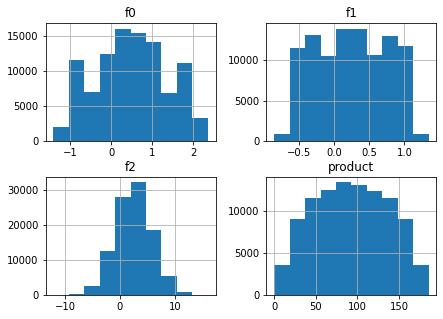

In [6]:
df_0.hist(figsize=(7,5));

Данные распределены нормально, во всех столбцах значение медианы практически равно среднему значению.

In [7]:
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


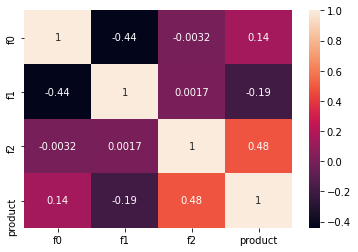

In [40]:
sns.heatmap(df_0.corr(), annot = True);

Есть небольшая корреляция между product и f2 = 0.48

In [9]:
df_1 = pd.read_csv('/datasets/geo_data_1.csv') # прочитаем csv-файл

In [10]:
df_1.head() # Выведем первые 5 строчек датафрейма df_1 на экран.

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [11]:
df_1.info() # Выведем основную информацию для датафрейма df_1 с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


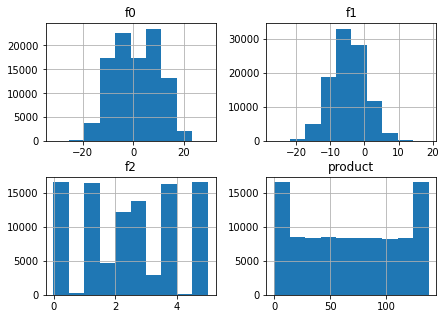

In [13]:
df_1.hist(figsize=(7,5));

Столбцы f0 и f1 распределены нормально, f2 и product имеют пики в графиках, неизвестно, что они означают.

In [46]:
df_1['f2'].value_counts()

3.996243    1
4.003988    1
1.996189    1
0.996936    1
3.998589    1
           ..
1.004759    1
4.997377    1
3.003466    1
0.001041    1
4.992682    1
Name: f2, Length: 100000, dtype: int64

In [55]:
df_1['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

In [14]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


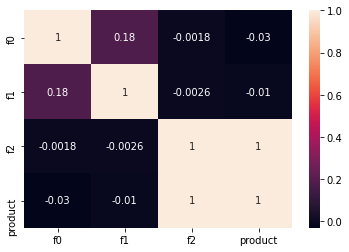

In [43]:
sns.heatmap(df_1.corr(), annot = True);

Есть сильная корреляция между f2 и product = 0.99. Но возможно, это связано с тем, что данные синтетические.

In [15]:
df_2 = pd.read_csv('/datasets/geo_data_2.csv') # прочитаем csv-файл

In [16]:
df_2.head() # Выведем первые 5 строчек датафрейма df_2 на экран.

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [17]:
df_2.info() # Выведем основную информацию для датафрейма df_2 с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [18]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


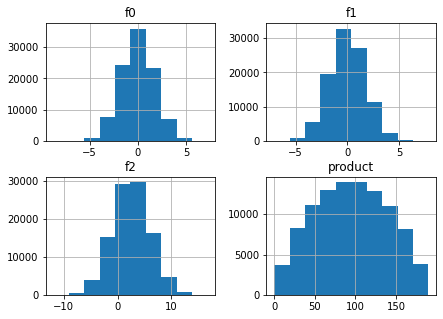

In [19]:
df_2.hist(figsize=(7,5));

Нормальное распределение данных.

In [20]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


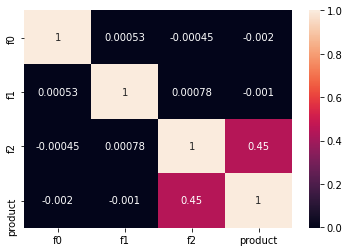

In [42]:
sns.heatmap(df_2.corr(), annot = True);

Видим тоже, что есть небольшая корреляция между product и f2 = 0.44.

Согласно документации к данным:

**Признаки**

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

**Целевой признак**

- product — объём запасов в скважине (тыс. баррелей).

Удалим столбец id (уникальный идентификатор скважины), который не влияет на обучение моделей, является неинформативным.

In [21]:
df_0 = df_0.drop(['id'], axis=1)
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)

Посмотрим есть ли дубликаты

In [22]:
print(df_0.duplicated().sum())
print(df_1.duplicated().sum())
print(df_2.duplicated().sum())

0
0
0


**Вывод:**

В таблицах по 5 столбцов и 100000 строк. Типы данных в столбцах каждой таблицы — float64(4), object(1) - соответствуют содержанию данных.  Пропущенных значений в таблицах нет. Дубликаты тоже отсутствуют. Столбец id - уникальный идентификатор скважины удалили, так как он не влияет на обучение моделей. Данные подготовлены для обучения.

## Обучение и проверка модели

Целевой признак - это 'product' (объём запасов в скважине). Признаки - f0, f1, f2 (три признака точек).

Разделим данные на признаки и целевой признак.

 Установим параметр (random_state) равным 12345. Объявим четыре переменные и запишем в них:

- Признаки: features_train, features_valid;
- Целевой признак: target_train, target_valid.

In [23]:
def split_data(df):
    features = df.drop(['product'] , axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
        test_size=0.25, random_state=12345)
    print('Обучающая выборка:',features_train.shape)
    print('Валидационная выборка:',features_valid.shape)
    return features_train, features_valid, target_train, target_valid

Выведем на экран размеры выборок

In [24]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_data(df_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(df_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(df_2)

Обучающая выборка: (75000, 3)
Валидационная выборка: (25000, 3)
Обучающая выборка: (75000, 3)
Валидационная выборка: (25000, 3)
Обучающая выборка: (75000, 3)
Валидационная выборка: (25000, 3)


Перейдем к обучению моделей.

In [25]:
def model_training (df):
    features = df.drop(['product'] , axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
        test_size=0.25, random_state=12345)
    model = LinearRegression() # инициализируем модель LinearRegression
    model.fit(features_train, target_train) # обучим модель на тренировочной выборке
    predictions_valid = pd.Series(model.predict(features_valid), index=features_valid.index)
    mse = mean_squared_error(target_valid, predictions_valid)
    print(f'RMSE модели = {mse ** 0.5:.3f}') # посчитаем значение метрики RMSE на валидационной выборке.
    print(f'Cредний запас предсказанного сырья = {predictions_valid.mean():.3f}') # посчитаем средний запас сырья 
    return predictions_valid

Посмотрим на основные показатели по каждому региону.

In [26]:
predictions_valid_0 = model_training(df_0) # Показатели первого региона.

RMSE модели = 37.579
Cредний запас предсказанного сырья = 92.593


In [27]:
predictions_valid_1 = model_training(df_1) # Показатели второго региона.

RMSE модели = 0.893
Cредний запас предсказанного сырья = 68.729


In [28]:
predictions_valid_2 = model_training(df_2) # Показатели второго региона.

RMSE модели = 40.030
Cредний запас предсказанного сырья = 94.965


RMSE показывает разность между предсказанными и наблюдаемыми значениями в модели. Величина RMSE должна быть как можно меньше. Наилучший показатель RMSE во втором регионе (0.893). Но средние запасы предсказанного сырья больше в 1 и 3 регионах - 92,6 и 94.9 соответственно.

## Подготовка к расчёту прибыли

**Условия задачи:**

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.  

Все ключевые значения для расчётов сохраним в отдельных переменных.

In [29]:
budget = 1e10 # Бюджет на разработку скважин в регионе
one_barrel = 450 # Один баррель сырья приносит 450 рублей дохода
income_barrel = 450*1000 # Доход с каждой единицы продукта 
study_points = 500 # При разведке региона исследуют 500 точек
study_best_points = 200 # 200 лучших точек для разработки
loss_probability = 2.5 # Порог вероятности убытков

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. 

In [30]:
volume_min = budget/study_best_points/income_barrel
print(f'Достаточный объём сырья для безубыточной разработки новой скважины равен {volume_min:.3f}', 'тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины равен 111.111 тыс. баррелей


Сравним полученный объём сырья со средним запасом в каждом регионе.

In [31]:
reg_0 = predictions_valid_0.mean()-volume_min
print(f'{reg_0:.2f}')

-18.52


In [32]:
reg_1 = predictions_valid_1.mean()-volume_min
print(f'{reg_1:.2f}')

-42.38


In [33]:
reg_2 = predictions_valid_2.mean()-volume_min
print(f'{reg_2:.2f}')

-16.15


При нынешних ценах один баррель сырья приносит 450 рублей дохода, достаточный объём сырья для безубыточной разработки новой скважины равен 111.111 тыс. баррелей. По предсказаниям в каждом регионе средний запас сырья скважины меньше полученного значения достаточного объёма сырья для безубыточной разработки новой скважины. В первом регионе на 18.52, во втором на 42.38, в третьем на 16.15 тыс. баррелей.

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

In [34]:
def profit_calculation(target, probabilities):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:200].sum()
    profit = selected * income_barrel - budget
    return selected * income_barrel - budget

In [35]:
print(f'Прибыль по первому региону: {profit_calculation(target_valid_0, predictions_valid_0):.2f}')
print(f'Прибыль по второму региону: {profit_calculation(target_valid_1, predictions_valid_1):.2f}')
print(f'Прибыль по третьему региону: {profit_calculation(target_valid_2, predictions_valid_2):.2f}')

Прибыль по первому региону: 3320826043.14
Прибыль по второму региону: 2415086696.68
Прибыль по третьему региону: 2710349963.60


Мы отобрали 200 лучших точек в каждом регионе, просуммировали данные по этим скважинам. Получили для них суммарный объем сырья, посчитали прибыль. В первом регионе прибыль составила 3, 32 млрд. рублей, во втором 2,41, в третьем 2,77 млрд. рублей.

В каждом из регионов мы получили внушительную прибыль - в разы превышающую прибыль, полученную с помощью техники `Bootstrap`. Так вышло, потому что выбираем 200 лучших скважин не из 500 случайных, а из 25000, т.е. шанс выбрать лучшие скважины значительно выше. А по условию бюджет выделяют на разведку 500 скважин, поэтому эти расчеты для нас малоинформативны, зато проверили работу функции прибыли.

## Расчёт прибыли и рисков 

Проведем процедуру Bootstrap.

In [36]:
def revenue(target, probabilities):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(study_points, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(profit_calculation(target_subsample, probs_subsample))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = values[values<0].count()/len(values)*100
    print(f'Средняя прибыль: {mean/10**6:.2f}', 'млн. рублей')
    print(f'Доверительный интервал от {lower/10**6:.2f} до {upper/10**6:.2f}')
    print(f'Риск убытков: {risk:.1f}%')
    return mean, lower, upper, risk

In [37]:
revenue(target_valid_0, predictions_valid_0) # Результаты по 1 региону

Средняя прибыль: 425.94 млн. рублей
Доверительный интервал от -102.09 до 947.98
Риск убытков: 6.0%


(425938526.91059244, -102090094.83793654, 947976353.3583689, 6.0)

In [38]:
revenue(target_valid_1, predictions_valid_1) # Результаты по 2 региону

Средняя прибыль: 515.22 млн. рублей
Доверительный интервал от 68.87 до 931.55
Риск убытков: 1.0%


(515222773.4432899, 68873225.37050176, 931547591.2570494, 1.0)

In [39]:
revenue(target_valid_2, predictions_valid_2) # Результаты по 3 региону

Средняя прибыль: 435.01 млн. рублей
Доверительный интервал от -128.88 до 969.71
Риск убытков: 6.4%


(435008362.7827556, -128880547.32978901, 969706954.1802661, 6.4)

Итак, мы получили следующие результаты:
- Самая высокая средняя прибыль у второго региона (515.22 млн. рублей), далее у третьего региона (435.01 млн. рублей) и первого (425.94 млн. рублей);
- Самый узкий доверительный интервал у второго региона (от 68.87 до 931.55);
- Самый низкий риск убытков во втором регионе (1%). В первом и третьем регионе риски достаточно велики. 

Для разработки скважин стоит рассмотреть второй регион (df_1), так как при разработке 200 скважин у него самая низкая вероятность убытков (минимальный процент риска), т.к. модель предсказывает хорошо (ошибка минимальная). При выборе 200 лучших скважин мы опираемся на предсказания по всем остальным показателям предсказывания он показывает лучшие результы.